In Germany seperation of power divides the political power into three branches of government, namely legislature, executive and judiciary.
Therefore the reinging party of a state should theoretically as part of the executive have no influence on judiciary. 

I want to test this and see if there is some correlation between reiging partys and the amount of telecommunication surveillance.

In [361]:
import pandas as pd
import numpy as np

#import sys
#sys.path.insert(0, '..')
#from src.dataProcessing import yearlySum

In [362]:
def yearlySum(xls):
    '''
    This function sums up the data of each year and returns a dataframe with the summed up data.
    '''
    # Get the names of all sheets in the Excel file
    sheet_names = xls.sheet_names

    # Read each sheet into a separate DataFrame and store them in a list
    dfs = [pd.read_excel(xls, sheet_name) for sheet_name in sheet_names]

    # Add a 'Year' column to each DataFrame
    for i in range(len(dfs)):
        dfs[i]['Year'] = sheet_names[i].replace('_surveillance', '')
    
    # Concatenate all DataFrames into one
    data = pd.concat(dfs, ignore_index=True)

    # Convert the 'Year' column to datetime index
    data['Year'] = data['Year'].astype(int)
    data['Year'] = pd.to_datetime(data['Year'], format='%Y')
    data.set_index('Year', inplace=True)

    #We only analyse pargraph 6 as these are the actual crimes
    data_paragraph6 = data[data['paragraph'].isin([1,6])]
    data_paragraph6_int = data_paragraph6.select_dtypes(include=['int'])
    data_yearly = data_paragraph6_int.groupby('Year').sum()
    
    return data_yearly

In [363]:
xls = pd.ExcelFile('../dat/surveillance_data.xlsx')
data = yearlySum(xls)
data = data.drop(columns=['GBA', 'overall'])
data


,paragraph,BW,BY,BE,BB,HB,HH,HE,MV,NI,NW,RP,SL,SN,ST,SH,TH
Year,,,,,,,,,,,,,,,,,
2013-01-01,234,2353,3501,2053,289,330,1175,5313,719,1701,2847,608,115,1166,523,107,338
2016-01-01,65,2076,4271,1845,288,329,1332,5835,324,2262,1927,638,285,1122,473,315,203
2019-01-01,252,2214,4186,1624,181,226,872,5680,365,1813,1132,548,99,654,415,258,285
2020-01-01,88,1988,3770,1364,268,150,949,5230,355,1335,1287,446,99,690,365,986,272
2021-01-01,264,1854,3905,1302,207,129,770,5311,283,1603,1086,526,87,535,397,910,242


Unfortuntly I was not able to find a ready to use dataset on the past governments of germanys states. Therefore I decide to manually take the data from WikiPedia.

https://www.statistik-bw.de/Service/Veroeff/Monatshefte/PDF/Beitrag22_03_09.
https://de.wikipedia.org/wiki/Ergebnisse_der_Landtagswahlen_in_der_Bundesrepublik_Deutschland

In [364]:
import glob
import os
# Get a list of all CSV files
csv_files = glob.glob('../dat/election_results_per_state/*.csv')

# Initialize an empty list to store the dataframes
dfs = []
# Loop through the list of CSV files
for filename in csv_files:
    # Read the CSV file
    government = pd.read_csv(filename, header=0)
    
    # Derive the state name from the filename
    state = os.path.basename(filename).replace('.csv', '')

    # Insert the new column at the third position (index=2)
    government.insert(2, 'State', state)
    
    # Append the dataframe to the list of dataframes
    dfs.append(government)

# Concatenate all dataframes in the list into a single dataframe
government = pd.concat(dfs, ignore_index=True)

government


,Wahltag,Wbt.,State,Grüne,CDU,SPD,FDP/DVP,AfD,NPD,REP,...,FDP,DVU,DZP,Piraten,BiW,SSW,FDP/DPS,FW,CSU,BP
0,27.03.2011,66.3,bw,24.2,39.0,23.1,5.3,0.0,1.0,1.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13.03.2016,70.4,bw,30.3,27.0,12.7,8.3,15.1,0.4,0.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14.03.2021,63.8,bw,32.6,24.1,11.0,10.5,9.7,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,27.09.2009,67.5,bb,5.6,19.8,33.0,NaN,0.0,NaN,NaN,...,7.2,1.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14.09.2014,47.9,bb,6.2,23.0,31.9,NaN,12.2,NaN,NaN,...,1.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,01.09.2019,61.3,bb,10.8,15.6,26.2,NaN,23.5,NaN,NaN,...,4.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,13.05.2012,59.6,nw,11.3,26.3,39.1,NaN,0.0,NaN,NaN,...,8.6,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,14.05.2017,65.2,nw,6.4,33.0,31.2,NaN,7.4,NaN,NaN,...,12.6,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,15.05.2022,55.5,nw,18.2,35.7,26.7,NaN,5.4,NaN,NaN,...,5.9,NaN,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,30.08.2009,56.2,th,6.2,31.2,18.5,NaN,0.0,NaN,NaN,...,7.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [365]:
by= pd.read_csv('../dat/election_results_per_state/by.csv', header=0)
by

,Wahltag,Wbt.,CSU,FW,AfD,Grüne,SPD,FDP,BP,NPD,Übrige,Reg1,Reg2,Reg3
0,28.09.2008,58.1,43.4,10.2,0.0,9.4,18.6,8.0,1.1,1.2,8.1,CSU,FDP,NaN
1,15.09.2013,63.9,47.7,9.0,0.0,8.6,20.6,3.3,2.1,0.6,8.1,CSU,NaN,NaN
2,14.10.2018,72.4,37.2,11.6,10.2,17.6,9.7,5.1,1.7,0.0,7.0,CSU,FW,NaN
3,8.10.2023,73.3,37.0,15.8,14.6,14.4,8.4,3.0,0.9,0.0,5.9,CSU,FW,NaN


In [366]:
government.columns

Index(['Wahltag', 'Wbt.', 'State', 'Grüne', 'CDU', 'SPD', 'FDP/DVP', 'AfD',
       'NPD', 'REP', 'Übrige', 'Reg1', 'Reg2', 'Reg3', 'Linke', 'BVB/FW',
       'FDP', 'DVU', 'DZP', 'Piraten', 'BiW', 'SSW', 'FDP/DPS', 'FW', 'CSU',
       'BP'],
      dtype='object')

In [367]:
government.loc[government['State'] == 'bw']

,Wahltag,Wbt.,State,Grüne,CDU,SPD,FDP/DVP,AfD,NPD,REP,...,FDP,DVU,DZP,Piraten,BiW,SSW,FDP/DPS,FW,CSU,BP
0,27.03.2011,66.3,bw,24.2,39.0,23.1,5.3,0.0,1.0,1.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13.03.2016,70.4,bw,30.3,27.0,12.7,8.3,15.1,0.4,0.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14.03.2021,63.8,bw,32.6,24.1,11.0,10.5,9.7,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [368]:
len(government['State'].unique()) == 16


True

In [369]:
government.fillna(0, inplace=True)
# Create a new column 'total' that contains the sum of all values in each row
government['total'] = government.iloc[:, 3:].sum(axis=1, numeric_only=True)

# Create a new column 'check' that checks if 'total' is equal to 1
government['check'] = government['total'] == 100
government

,Wahltag,Wbt.,State,Grüne,CDU,SPD,FDP/DVP,AfD,NPD,REP,...,DZP,Piraten,BiW,SSW,FDP/DPS,FW,CSU,BP,total,check
0,27.03.2011,66.3,bw,24.2,39.0,23.1,5.3,0.0,1.0,1.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.00,True
1,13.03.2016,70.4,bw,30.3,27.0,12.7,8.3,15.1,0.4,0.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.00,True
2,14.03.2021,63.8,bw,32.6,24.1,11.0,10.5,9.7,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.00,True
3,27.09.2009,67.5,bb,5.6,19.8,33.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.12,False
4,14.09.2014,47.9,bb,6.2,23.0,31.9,0.0,12.2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.70,False
5,01.09.2019,61.3,bb,10.8,15.6,26.2,0.0,23.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101.00,False
6,13.05.2012,59.6,nw,11.3,26.3,39.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.00,True
7,14.05.2017,65.2,nw,6.4,33.0,31.2,0.0,7.4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.00,True
8,15.05.2022,55.5,nw,18.2,35.7,26.7,0.0,5.4,0.0,0.0,...,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.10,False
9,30.08.2009,56.2,th,6.2,31.2,18.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.00,True


In [370]:
government.dtypes


Wahltag     object
Wbt.       float64
State       object
Grüne      float64
CDU        float64
SPD        float64
FDP/DVP    float64
AfD        float64
NPD        float64
REP        float64
Übrige     float64
Reg1        object
Reg2        object
Reg3        object
Linke      float64
BVB/FW     float64
FDP        float64
DVU        float64
DZP        float64
Piraten    float64
BiW        float64
SSW        float64
FDP/DPS    float64
FW         float64
CSU        float64
BP         float64
total      float64
check         bool
dtype: object

We can see that we have lots of parties in Germany. However we are more interested in the general pattern and some of these parties are very small opposition partys, which I would bundle into the "Übrige" Category. I make the following assumptions:
- if a party fails to at least jump over 5% of votes, I will drop it and add its percentage to "Übrige"
- FDP had partnerships with other parties however we will put them together anyways

In [371]:
# Define the threshold
threshold = 10

# Loop over the columns (parties)
for column in government.columns:
    # Check if the party received less than the threshold
    if column not in ['Wahltag', 'Wbt.', 'State', 'Reg1','Reg2', 'Reg3'] and government[column].max() < threshold:
        # Add the votes to the 'Übrige' column
        government['Übrige'] += government[column]
        # Drop the column
        government = government.drop(column, axis=1)

# If there are any partnerships with FDP, add them to the FDP column
partnerships = ['FDP/DVP', 'FDP/DPS']  # replace with actual column names
for partner in partnerships:
    if partner in government.columns:
        government['FDP'] += government[partner]
        government = government.drop(partner, axis=1)

#also add CSU and CDU
government['CDU'] += government['CSU']
government = government.drop('CSU', axis=1)

In [372]:
government

,Wahltag,Wbt.,State,Grüne,CDU,SPD,AfD,Übrige,Reg1,Reg2,Reg3,Linke,FDP,FW,total
0,27.03.2011,66.3,bw,24.2,39.0,23.1,0.0,9.40,Grüne,SPD,0,0.0,5.3,0.0,100.00
1,13.03.2016,70.4,bw,30.3,27.0,12.7,15.1,7.60,Grüne,CDU,0,0.0,8.3,0.0,100.00
2,14.03.2021,63.8,bw,32.6,24.1,11.0,9.7,13.10,Grüne,CDU,0,0.0,10.5,0.0,100.00
3,27.09.2009,67.5,bb,5.6,19.8,33.0,0.0,7.32,SPD,Linke,0,27.2,7.2,0.0,100.12
4,14.09.2014,47.9,bb,6.2,23.0,31.9,12.2,9.30,SPD,Linke,0,18.6,1.5,0.0,102.70
5,01.09.2019,61.3,bb,10.8,15.6,26.2,23.5,10.10,SPD,Grüne,CDU,10.7,4.1,0.0,101.00
6,13.05.2012,59.6,nw,11.3,26.3,39.1,0.0,13.20,SPD,Grüne,0,2.5,8.6,0.0,100.00
7,14.05.2017,65.2,nw,6.4,33.0,31.2,7.4,5.50,CDU,FDP,0,4.9,12.6,0.0,100.00
8,15.05.2022,55.5,nw,18.2,35.7,26.7,5.4,6.10,CDU,Grüne,0,2.1,5.9,0.0,100.10
9,30.08.2009,56.2,th,6.2,31.2,18.5,0.0,10.10,CDU,SPD,0,27.4,7.6,0.0,100.00


From Experiment 2 we know that the States Bavaria & Hessen are the ones where surveillence laws get applied most frequently. Also they behave very similiary over time.

In both countrys the CDU is in governemnt...

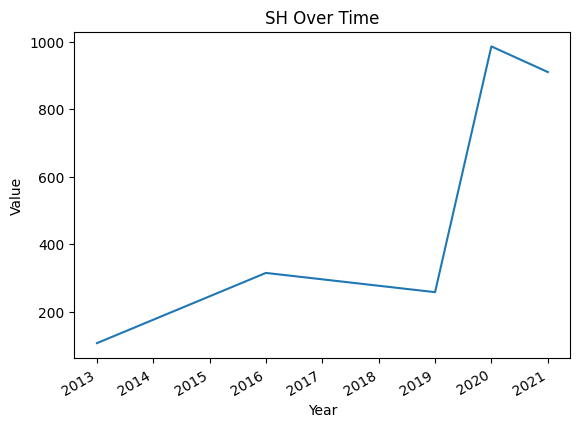

In [373]:
import matplotlib.pyplot as plt

# Plot the 'BW' column
data['SH'].plot()

# Set the title and labels
plt.title('SH Over Time')
plt.xlabel('Year')
plt.ylabel('Value')

# Show the plot
plt.show()

Also in Schleswig-Holstein the CDU is in government. Lets set up a new data set and see if we find correlations between parties in government and applied laws.

In [374]:
data
data.index = data.index.year
data


,paragraph,BW,BY,BE,BB,HB,HH,HE,MV,NI,NW,RP,SL,SN,ST,SH,TH
Year,,,,,,,,,,,,,,,,,
2013,234,2353,3501,2053,289,330,1175,5313,719,1701,2847,608,115,1166,523,107,338
2016,65,2076,4271,1845,288,329,1332,5835,324,2262,1927,638,285,1122,473,315,203
2019,252,2214,4186,1624,181,226,872,5680,365,1813,1132,548,99,654,415,258,285
2020,88,1988,3770,1364,268,150,949,5230,355,1335,1287,446,99,690,365,986,272
2021,264,1854,3905,1302,207,129,770,5311,283,1603,1086,526,87,535,397,910,242


In [375]:
for state in data.columns[1:]:
    data = data.assign(**{f'{state}_Reg1': np.nan, f'{state}_Reg2': np.nan, f'{state}_Reg3': np.nan})
data

,paragraph,BW,BY,BE,BB,HB,HH,HE,MV,NI,...,SN_Reg3,ST_Reg1,ST_Reg2,ST_Reg3,SH_Reg1,SH_Reg2,SH_Reg3,TH_Reg1,TH_Reg2,TH_Reg3
Year,,,,,,,,,,,,,,,,,,,,,
2013,234,2353,3501,2053,289,330,1175,5313,719,1701,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,65,2076,4271,1845,288,329,1332,5835,324,2262,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,252,2214,4186,1624,181,226,872,5680,365,1813,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020,88,1988,3770,1364,268,150,949,5230,355,1335,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021,264,1854,3905,1302,207,129,770,5311,283,1603,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [376]:
data = data.sort_index(axis=1)
data

,BB,BB_Reg1,BB_Reg2,BB_Reg3,BE,BE_Reg1,BE_Reg2,BE_Reg3,BW,BW_Reg1,...,SN_Reg3,ST,ST_Reg1,ST_Reg2,ST_Reg3,TH,TH_Reg1,TH_Reg2,TH_Reg3,paragraph
Year,,,,,,,,,,,,,,,,,,,,,
2013,289,NaN,NaN,NaN,2053,NaN,NaN,NaN,2353,NaN,...,NaN,523,NaN,NaN,NaN,338,NaN,NaN,NaN,234
2016,288,NaN,NaN,NaN,1845,NaN,NaN,NaN,2076,NaN,...,NaN,473,NaN,NaN,NaN,203,NaN,NaN,NaN,65
2019,181,NaN,NaN,NaN,1624,NaN,NaN,NaN,2214,NaN,...,NaN,415,NaN,NaN,NaN,285,NaN,NaN,NaN,252
2020,268,NaN,NaN,NaN,1364,NaN,NaN,NaN,1988,NaN,...,NaN,365,NaN,NaN,NaN,272,NaN,NaN,NaN,88
2021,207,NaN,NaN,NaN,1302,NaN,NaN,NaN,1854,NaN,...,NaN,397,NaN,NaN,NaN,242,NaN,NaN,NaN,264


In [377]:
data.index

Index([2013, 2016, 2019, 2020, 2021], dtype='int32', name='Year')

In [378]:
government = government[['Wahltag', 'State', 'Reg1', 'Reg2', 'Reg3','CDU', 'SPD', 'Grüne', 'Linke', 'AfD']]
government.loc[:, 'Wahltag'] = pd.to_datetime(government['Wahltag'], format='%d.%m.%Y').dt.year

government.set_index('Wahltag', inplace=True)
government

,State,Reg1,Reg2,Reg3,CDU,SPD,Grüne,Linke,AfD
Wahltag,,,,,,,,,
2011,bw,Grüne,SPD,0,39.0,23.1,24.2,0.0,0.0
2016,bw,Grüne,CDU,0,27.0,12.7,30.3,0.0,15.1
2021,bw,Grüne,CDU,0,24.1,11.0,32.6,0.0,9.7
2009,bb,SPD,Linke,0,19.8,33.0,5.6,27.2,0.0
2014,bb,SPD,Linke,0,23.0,31.9,6.2,18.6,12.2
2019,bb,SPD,Grüne,CDU,15.6,26.2,10.8,10.7,23.5
2012,nw,SPD,Grüne,0,26.3,39.1,11.3,2.5,0.0
2017,nw,CDU,FDP,0,33.0,31.2,6.4,4.9,7.4
2022,nw,CDU,Grüne,0,35.7,26.7,18.2,2.1,5.4


In [379]:
# Create a new DataFrame with unique years
unique_years = pd.DataFrame(government.index.unique(), columns=['Wahltag'])

# For each unique state
for state in government['State'].unique():
    # Filter government for this state
    state_df = government[government['State'] == state].copy()
    # Drop the 'State' column
    state_df.drop(columns='State', inplace=True)
    # Rename the other columns to include the state value
    state = state.upper()
    state_df.columns = [f'{state}_{col}' for col in state_df.columns]
    # Merge with unique_years on 'Wahltag'
    unique_years = pd.merge(unique_years, state_df, on='Wahltag', how='left')

unique_years.set_index('Wahltag', inplace=True)
unique_years.sort_index(axis=1, inplace=True)

unique_years

,BB_AfD,BB_CDU,BB_Grüne,BB_Linke,BB_Reg1,BB_Reg2,BB_Reg3,BB_SPD,BE_AfD,BE_CDU,...,ST_Reg3,ST_SPD,TH_AfD,TH_CDU,TH_Grüne,TH_Linke,TH_Reg1,TH_Reg2,TH_Reg3,TH_SPD
Wahltag,,,,,,,,,,,,,,,,,,,,,
2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,23.3,...,0,21.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.2,17.6,...,Grüne,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,18.0,...,Grüne,8.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,0.0,19.8,5.6,27.2,SPD,Linke,0,33.0,NaN,NaN,...,NaN,NaN,0.0,31.2,6.2,27.4,CDU,SPD,0,18.5
2014,12.2,23.0,6.2,18.6,SPD,Linke,0,31.9,NaN,NaN,...,NaN,NaN,10.6,33.5,5.7,28.2,Linke,SPD,Grüne,12.4
2019,23.5,15.6,10.8,10.7,SPD,Grüne,CDU,26.2,NaN,NaN,...,NaN,NaN,23.4,21.7,5.2,31.0,Linke,SPD,Grüne,8.2
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [380]:
unique_years = unique_years.sort_index()
unique_years

,BB_AfD,BB_CDU,BB_Grüne,BB_Linke,BB_Reg1,BB_Reg2,BB_Reg3,BB_SPD,BE_AfD,BE_CDU,...,ST_Reg3,ST_SPD,TH_AfD,TH_CDU,TH_Grüne,TH_Linke,TH_Reg1,TH_Reg2,TH_Reg3,TH_SPD
Wahltag,,,,,,,,,,,,,,,,,,,,,
2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,0.0,19.8,5.6,27.2,SPD,Linke,0,33.0,NaN,NaN,...,NaN,NaN,0.0,31.2,6.2,27.4,CDU,SPD,0,18.5
2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,23.3,...,0,21.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,12.2,23.0,6.2,18.6,SPD,Linke,0,31.9,NaN,NaN,...,NaN,NaN,10.6,33.5,5.7,28.2,Linke,SPD,Grüne,12.4
2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.2,17.6,...,Grüne,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [381]:
unique_years = unique_years.fillna(method='ffill')
unique_years

/var/folders/81/7cc4l6x15vn92s_3hb78hbr40000gn/T/ipykernel_25949/955420075.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  unique_years = unique_years.fillna(method='ffill')


,BB_AfD,BB_CDU,BB_Grüne,BB_Linke,BB_Reg1,BB_Reg2,BB_Reg3,BB_SPD,BE_AfD,BE_CDU,...,ST_Reg3,ST_SPD,TH_AfD,TH_CDU,TH_Grüne,TH_Linke,TH_Reg1,TH_Reg2,TH_Reg3,TH_SPD
Wahltag,,,,,,,,,,,,,,,,,,,,,
2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,0.0,19.8,5.6,27.2,SPD,Linke,0,33.0,NaN,NaN,...,NaN,NaN,0.0,31.2,6.2,27.4,CDU,SPD,0,18.5
2011,0.0,19.8,5.6,27.2,SPD,Linke,0,33.0,0.0,23.3,...,0,21.5,0.0,31.2,6.2,27.4,CDU,SPD,0,18.5
2012,0.0,19.8,5.6,27.2,SPD,Linke,0,33.0,0.0,23.3,...,0,21.5,0.0,31.2,6.2,27.4,CDU,SPD,0,18.5
2013,0.0,19.8,5.6,27.2,SPD,Linke,0,33.0,0.0,23.3,...,0,21.5,0.0,31.2,6.2,27.4,CDU,SPD,0,18.5
2014,12.2,23.0,6.2,18.6,SPD,Linke,0,31.9,0.0,23.3,...,0,21.5,10.6,33.5,5.7,28.2,Linke,SPD,Grüne,12.4
2015,12.2,23.0,6.2,18.6,SPD,Linke,0,31.9,0.0,23.3,...,0,21.5,10.6,33.5,5.7,28.2,Linke,SPD,Grüne,12.4
2016,12.2,23.0,6.2,18.6,SPD,Linke,0,31.9,14.2,17.6,...,Grüne,10.6,10.6,33.5,5.7,28.2,Linke,SPD,Grüne,12.4
2017,12.2,23.0,6.2,18.6,SPD,Linke,0,31.9,14.2,17.6,...,Grüne,10.6,10.6,33.5,5.7,28.2,Linke,SPD,Grüne,12.4


In [382]:
selected_years = unique_years.loc[[2013, 2016, 2019, 2020, 2021]]
selected_years

,BB_AfD,BB_CDU,BB_Grüne,BB_Linke,BB_Reg1,BB_Reg2,BB_Reg3,BB_SPD,BE_AfD,BE_CDU,...,ST_Reg3,ST_SPD,TH_AfD,TH_CDU,TH_Grüne,TH_Linke,TH_Reg1,TH_Reg2,TH_Reg3,TH_SPD
Wahltag,,,,,,,,,,,,,,,,,,,,,
2013,0.0,19.8,5.6,27.2,SPD,Linke,0,33.0,0.0,23.3,...,0,21.5,0.0,31.2,6.2,27.4,CDU,SPD,0,18.5
2016,12.2,23.0,6.2,18.6,SPD,Linke,0,31.9,14.2,17.6,...,Grüne,10.6,10.6,33.5,5.7,28.2,Linke,SPD,Grüne,12.4
2019,23.5,15.6,10.8,10.7,SPD,Grüne,CDU,26.2,14.2,17.6,...,Grüne,10.6,23.4,21.7,5.2,31.0,Linke,SPD,Grüne,8.2
2020,23.5,15.6,10.8,10.7,SPD,Grüne,CDU,26.2,14.2,17.6,...,Grüne,10.6,23.4,21.7,5.2,31.0,Linke,SPD,Grüne,8.2
2021,23.5,15.6,10.8,10.7,SPD,Grüne,CDU,26.2,8.0,18.0,...,Grüne,8.4,23.4,21.7,5.2,31.0,Linke,SPD,Grüne,8.2


In [383]:
# Create a DataFrame with the years you're interested in
years_df = pd.DataFrame([2013, 2016, 2019, 2020, 2021], columns=['Wahltag'])

# Reset the index of unique_years so 'Wahltag' becomes a column
unique_years_reset = unique_years.reset_index()

# Merge the two DataFrames on 'Wahltag'
selected_years = pd.merge(years_df, unique_years_reset, on='Wahltag')

# Set 'Wahltag' back as the index
selected_years.set_index('Wahltag', inplace=True)
selected_years

,BB_AfD,BB_CDU,BB_Grüne,BB_Linke,BB_Reg1,BB_Reg2,BB_Reg3,BB_SPD,BE_AfD,BE_CDU,...,ST_Reg3,ST_SPD,TH_AfD,TH_CDU,TH_Grüne,TH_Linke,TH_Reg1,TH_Reg2,TH_Reg3,TH_SPD
Wahltag,,,,,,,,,,,,,,,,,,,,,
2013,0.0,19.8,5.6,27.2,SPD,Linke,0,33.0,0.0,23.3,...,0,21.5,0.0,31.2,6.2,27.4,CDU,SPD,0,18.5
2016,12.2,23.0,6.2,18.6,SPD,Linke,0,31.9,14.2,17.6,...,Grüne,10.6,10.6,33.5,5.7,28.2,Linke,SPD,Grüne,12.4
2019,23.5,15.6,10.8,10.7,SPD,Grüne,CDU,26.2,14.2,17.6,...,Grüne,10.6,23.4,21.7,5.2,31.0,Linke,SPD,Grüne,8.2
2020,23.5,15.6,10.8,10.7,SPD,Grüne,CDU,26.2,14.2,17.6,...,Grüne,10.6,23.4,21.7,5.2,31.0,Linke,SPD,Grüne,8.2
2021,23.5,15.6,10.8,10.7,SPD,Grüne,CDU,26.2,8.0,18.0,...,Grüne,8.4,23.4,21.7,5.2,31.0,Linke,SPD,Grüne,8.2


In [389]:
# Drop the columns in `data` that are in `selected_years`
data = data.drop(columns=selected_years.columns)

# Concatenate `selected_years` with `data` along the columns axis
data = pd.concat([data, selected_years], axis=1)

# Replace 'CSU' with 'CDU'
data = data.replace('CSU', 'CDU')

# Sort the columns
data.sort_index(axis=1, inplace=True)

data

,BB,BB_AfD,BB_CDU,BB_Grüne,BB_Linke,BB_Reg1,BB_Reg2,BB_Reg3,BB_SPD,BE,...,TH,TH_AfD,TH_CDU,TH_Grüne,TH_Linke,TH_Reg1,TH_Reg2,TH_Reg3,TH_SPD,paragraph
2013,289,0.0,19.8,5.6,27.2,SPD,Linke,0,33.0,2053,...,338,0.0,31.2,6.2,27.4,CDU,SPD,0,18.5,234
2016,288,12.2,23.0,6.2,18.6,SPD,Linke,0,31.9,1845,...,203,10.6,33.5,5.7,28.2,Linke,SPD,Grüne,12.4,65
2019,181,23.5,15.6,10.8,10.7,SPD,Grüne,CDU,26.2,1624,...,285,23.4,21.7,5.2,31.0,Linke,SPD,Grüne,8.2,252
2020,268,23.5,15.6,10.8,10.7,SPD,Grüne,CDU,26.2,1364,...,272,23.4,21.7,5.2,31.0,Linke,SPD,Grüne,8.2,88
2021,207,23.5,15.6,10.8,10.7,SPD,Grüne,CDU,26.2,1302,...,242,23.4,21.7,5.2,31.0,Linke,SPD,Grüne,8.2,264


Finallay a dataproduct !!


In [397]:
# data for one state is always stored in 4 columns
#-> we need to group the columns by 4
law_with_CDU  = 0
law_without_CDU = 0

law_with_SPD = 0    
law_without_SPD = 0

law_with_Linke = 0
law_without_Linke = 0

law_with_Gruene = 0
law_without_Gruene = 0

nr_of_gov_cdu = 0
nr_of_gov_spd = 0
nr_of_gov_linke = 0
nr_of_gov_gruene = 0



weight_afd = 0
weight_cdu = 0
weight_spd = 0
weight_linke = 0
weight_gruene = 0


for i in range(0, len(data.columns)-1, 9):
    window = data.iloc[:, i:i+9]
    # Do something with the window
    state = window.columns[0]
    for year in window.index:
        if (window.loc[year, [f'{state}_Reg1', f'{state}_Reg2', f'{state}_Reg3']] == 'CDU').any():
            law_with_CDU += window.loc[year, state]
            nr_of_gov_cdu += 1
        else:
            law_without_CDU += window.loc[year, state]

        if (window.loc[year, [f'{state}_Reg1', f'{state}_Reg2', f'{state}_Reg3']] == 'SPD').any():
            law_with_SPD += window.loc[year, state]
            nr_of_gov_spd += 1
        else:
            law_without_SPD += window.loc[year, state]

        if (window.loc[year, [f'{state}_Reg1', f'{state}_Reg2', f'{state}_Reg3']] == 'Linke').any():
            law_with_Linke += window.loc[year, state]
            nr_of_gov_linke += 1
        else:
            law_without_Linke += window.loc[year, state]
        
        if (window.loc[year, [f'{state}_Reg1', f'{state}_Reg2', f'{state}_Reg3']] == 'Grüne').any():
            law_with_Gruene += window.loc[year, state]
            nr_of_gov_gruene += 1
        else:   
            law_without_Gruene += window.loc[year, state]
        
        weight_afd += window.loc[year, f'{state}_AfD'] *0.01* window.loc[year, state]
        weight_cdu += window.loc[year, f'{state}_CDU'] *0.01* window.loc[year, state]
        weight_spd += window.loc[year, f'{state}_SPD'] *0.01* window.loc[year, state]
        weight_linke += window.loc[year, f'{state}_Linke'] *0.01* window.loc[year, state]
        weight_gruene += window.loc[year, f'{state}_Grüne'] *0.01* window.loc[year, state]


print('law_with_CDU: ', law_with_CDU)
print('law_without_CDU: ', law_without_CDU)
print('law_with_SPD: ', law_with_SPD)
print('law_without_SPD: ', law_without_SPD)
print('law_with_Linke: ', law_with_Linke)
print('law_without_Linke: ', law_without_Linke)
print('law_with_Gruene: ', law_with_Gruene)
print('law_without_Gruene: ', law_without_Gruene)

print('weight_afd: ', weight_afd)
print('weight_cdu: ', weight_cdu)
print('weight_spd: ', weight_spd)
print('weight_linke: ', weight_linke)
print('weight_gruene: ', weight_gruene)

print('nr_of_gov_cdu: ', nr_of_gov_cdu)
print('nr_of_gov_spd: ', nr_of_gov_spd)
print('nr_of_gov_linke: ', nr_of_gov_linke)
print('nr_of_gov_gruene: ', nr_of_gov_gruene)


law_with_CDU:  75326
law_without_CDU:  30590
law_with_SPD:  31661
law_without_SPD:  74255
law_with_Linke:  1862
law_without_Linke:  104054
law_with_Gruene:  57120
law_without_Gruene:  48796
weight_afd:  8607.339
weight_cdu:  33036.16000000001
weight_spd:  25248.020999999997
weight_linke:  6047.481000000002
weight_gruene:  15703.095999999998
nr_of_gov_cdu:  46
nr_of_gov_spd:  47
nr_of_gov_linke:  7
nr_of_gov_gruene:  38


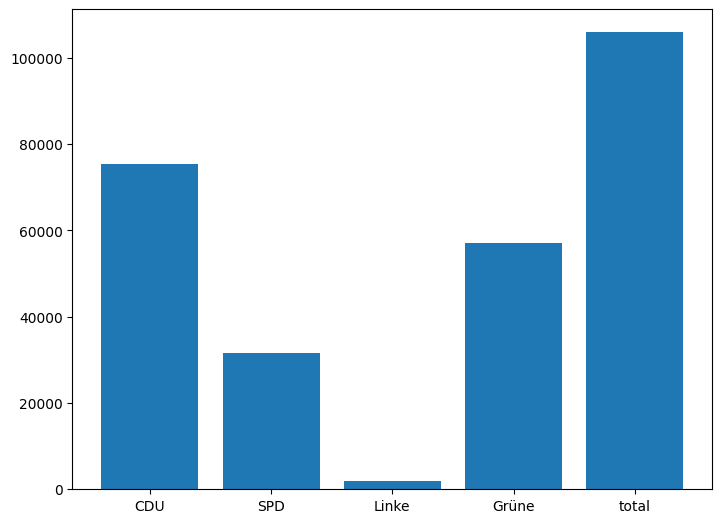

In [404]:
#plot the above results as bar plot
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
parties = ['CDU', 'SPD', 'Linke', 'Grüne', 'total']
laws = [law_with_CDU, law_with_SPD, law_with_Linke, law_with_Gruene, law_with_CDU+law_without_CDU]
ax.bar(parties,laws)
plt.show()


This plot shows: If a law has been applied in one of the 5 available years, 

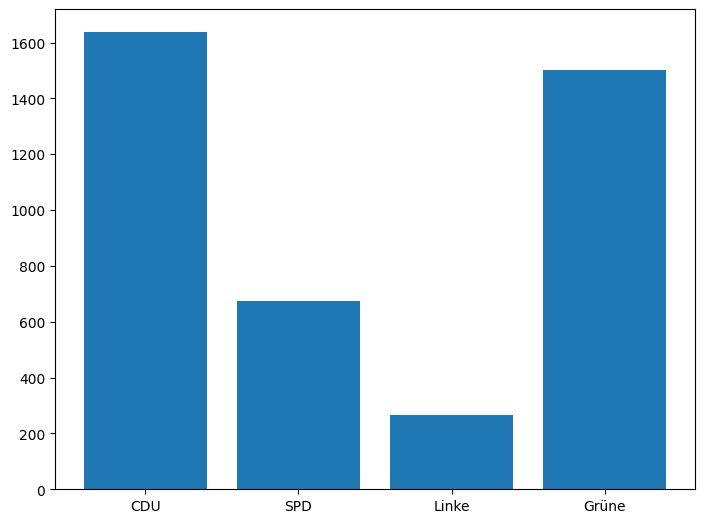

In [406]:
#plot the above results as bar plot
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
parties = ['CDU', 'SPD', 'Linke', 'Grüne']
laws = [law_with_CDU/nr_of_gov_cdu, law_with_SPD/nr_of_gov_spd, law_with_Linke/nr_of_gov_linke, 
        law_with_Gruene/nr_of_gov_gruene]
ax.bar(parties,laws)
plt.show()

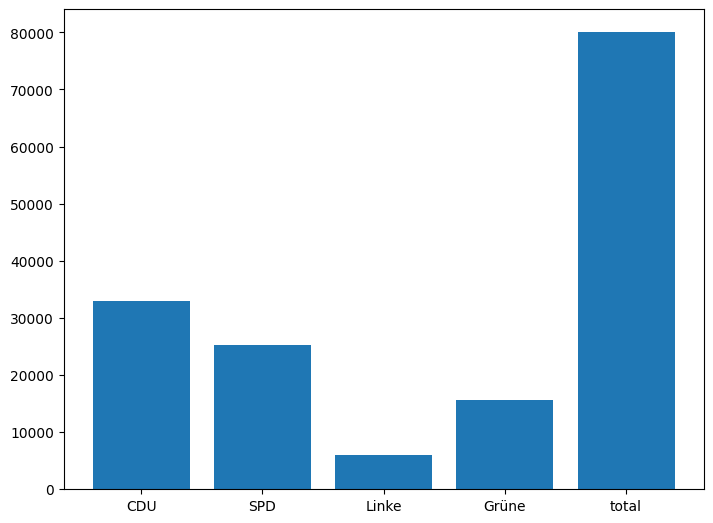

In [405]:
#plot the above results as bar plot
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
parties = ['CDU', 'SPD', 'Linke', 'Grüne', 'total']
weights = [weight_cdu, weight_spd, weight_linke, weight_gruene, weight_cdu+weight_spd+weight_linke+weight_gruene]
ax.bar(parties,weights)
plt.show()

Conditional Probabilities? is the prob increased, if eg. CDU is in the executive?
Can we use the election data to predict surveillance? 